In [1]:
import pandas as pd
import numpy as np

/Users/marie-anne/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/marie-anne/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
test = pd.read_csv('test.csv', low_memory=False)
train = pd.read_csv('train.csv', low_memory=False)
stores = pd.read_csv('store.csv') 

In [3]:
print('TRAIN:',train.shape,'\n',train.head())
print('\nTEST:',test.shape,'\n',test.head())
print('\nSTORES:',stores.shape,'\n',stores.head())

TRAIN: (1017209, 9) 
    Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

TEST: (41088, 8) 
    Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0

On ne garde que le tableau train car test ne contient pas les sales

In [4]:
df = train.copy()

In [5]:
#on merge les tableaux stores et df
df = pd.merge(df, stores, on = ['Store'])
print(df.shape)

(1017209, 18)


In [6]:
#on regarde le nombre de valeurs nan
for col in df.columns:
    print(col,':',df[col].isnull().sum())

Store : 0
DayOfWeek : 0
Date : 0
Sales : 0
Customers : 0
Open : 0
Promo : 0
StateHoliday : 0
SchoolHoliday : 0
StoreType : 0
Assortment : 0
CompetitionDistance : 2642
CompetitionOpenSinceMonth : 323348
CompetitionOpenSinceYear : 323348
Promo2 : 0
Promo2SinceWeek : 508031
Promo2SinceYear : 508031
PromoInterval : 508031


In [7]:
#on ajoute une colonne 'competition'
df['Competition'] = df['CompetitionDistance'].apply(lambda x: 0 if np.isnan(x) == True else 1)
print(df['Competition'].value_counts(),'\n')

#on supprime les données correspondant à des magasins fermés
df = df.drop(index=df.loc[df['Open']==0,:].index)

#on remplace par la plus grande distance possible les valeurs nan de CompetionDistance 
#(en suivant l'hypothèse qu'une valeur nan à CompetitionDistance signifie absence de magasin concurrent proche, ce qui équivaut à un magasin concurrent lointain))
maxi = max(df['CompetitionDistance'])
df['CompetitionDistance'] = df['CompetitionDistance'].apply(lambda x: maxi if np.isnan(x)==True else x)
    
#on regarde le nombre de valeurs nan
for col in df.columns:
    print(col,':',df[col].isnull().sum())

1    1014567
0       2642
Name: Competition, dtype: int64 

Store : 0
DayOfWeek : 0
Date : 0
Sales : 0
Customers : 0
Open : 0
Promo : 0
StateHoliday : 0
SchoolHoliday : 0
StoreType : 0
Assortment : 0
CompetitionDistance : 0
CompetitionOpenSinceMonth : 268619
CompetitionOpenSinceYear : 268619
Promo2 : 0
Promo2SinceWeek : 423307
Promo2SinceYear : 423307
PromoInterval : 423307
Competition : 0


In [8]:
#on enleve les colonnes date autre que 'Date'
df = df.drop(columns=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear'])
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2', 'PromoInterval', 'Competition'],
      dtype='object')


In [9]:
#on enregistre les dates dans plusieurs variables
df['MonthThird'] = df['Date'].apply(lambda x: 1 if int(x[-2:]) <= 10 else 2 if (int(x[-2:])>10 and int(x[-2:])<=20) else 3)
df['Month'] = df['Date'].apply(lambda x: x[5:7])
df['Year'] = df['Date'].apply(lambda x: x[:4])

from datetime import datetime
df['WeekOfYear'] = df['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').isocalendar()[1])

In [10]:
#On observe les valeurs prises par les differentes variables pour voir comment les traiter
for col in df.columns:
    print('\n',col.upper(),'\n',df[col].value_counts())


 STORE 
 85      942
1097    942
562     942
335     942
769     942
733     942
262     942
682     942
423     942
494     942
259     932
274     932
353     931
948     928
676     918
530     906
578     901
310     897
1099    893
453     887
863     887
122     885
732     883
1045    883
299     882
209     882
524     881
867     880
931     875
433     862
       ... 
542     622
646     622
287     622
1065    622
633     622
132     622
471     622
903     622
637     622
129     622
904     622
41      622
365     621
13      621
215     621
32      621
919     621
342     621
670     621
20      619
22      619
638     618
492     614
183     611
145     608
909     607
100     606
744     605
348     597
644     592
Name: Store, Length: 1115, dtype: int64

 DAYOFWEEK 
 6    144058
2    143961
3    141936
5    138640
1    137560
4    134644
7      3593
Name: DayOfWeek, dtype: int64

 DATE 
 2015-06-10    1115
2015-02-11    1115
2013-11-09    1115
2013-12-06    1115
2015-

In [11]:
#on supprime certaines variables
df = df.drop(columns=['Store','Date','PromoInterval', 'Open'])

#on transforme la variable 'Assortment' en variable numerique (car hiérarchie des valeurs prises)
df['Assortment'] = df['Assortment'].apply(lambda x: 1 if x=='a' else 2 if x=='b' else 3 if x=='c' else x)

#on transforme les variables catégorielles en dummies
dummies_col = ['DayOfWeek', 'StateHoliday', 'StoreType', 'WeekOfYear', 'Month', 'Year']

for col in dummies_col:
    tmp = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,tmp], axis=1)
    del tmp
    
df = df.drop(columns=dummies_col)

In [12]:
print(df.shape)
print(df.columns)

(844392, 91)
Index(['Sales', 'Customers', 'Promo', 'SchoolHoliday', 'Assortment',
       'CompetitionDistance', 'Promo2', 'Competition', 'MonthThird',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'WeekOfYear_1',
       'WeekOfYear_2', 'WeekOfYear_3', 'WeekOfYear_4', 'WeekOfYear_5',
       'WeekOfYear_6', 'WeekOfYear_7', 'WeekOfYear_8', 'WeekOfYear_9',
       'WeekOfYear_10', 'WeekOfYear_11', 'WeekOfYear_12', 'WeekOfYear_13',
       'WeekOfYear_14', 'WeekOfYear_15', 'WeekOfYear_16', 'WeekOfYear_17',
       'WeekOfYear_18', 'WeekOfYear_19', 'WeekOfYear_20', 'WeekOfYear_21',
       'WeekOfYear_22', 'WeekOfYear_23', 'WeekOfYear_24', 'WeekOfYear_25',
       'WeekOfYear_26', 'WeekOfYear_27', 'WeekOfYear_28', 'WeekOfYear_29',
       'WeekOfYear_30', 'WeekOfYear_31', 'WeekOfYea

In [13]:
#split test-train
y = df['Sales']
X = df.loc[:, df.columns != 'Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/Users/marie-anne/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.961472791716437
Erreur type: 608.89024743418


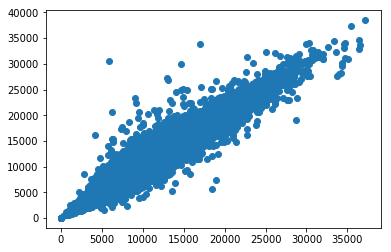

In [14]:
#on teste un modeèle de Random Forest
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_jobs=-1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

r2 = RF.score(X_test,y_test)
print(r2)

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_pred))
print("Erreur type:",rmse)

import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.show()

le R2 est très élevé, le modèle semble très bien prédire le niveau de ventes.
/!\ risque d'overfitting

En observant le graphique, on remarque que la prédiction des sales par le modèle semble proche de la réalité.

### pour implémenter un système d'alerting:
- on verifie d'abord que le magasin est ouvert (s'il est fermé, pas d'alerte)
- on applique le modèle obtenu aux données que l'on souhaite tester
- à partir des prédictions obtenues, on applique une formule pour déterminer un seuil en-dessous duquel on active une alerte
- Cette formule à appliquer aux prédictions obtenues pourrait être la suivante : ( prediction - (erreur type) ) * pourcentage (par ex 80%). Ce système permettrait d'alerter sur le fait qu'un magasin a effectué moins de 80% du nombre de ventes que le modèle attend de lui (l'erreur type du modèle permet d'inclure une marge d'erreur).

### autres idées:
1. utiliser les dates incluses dans les variables Promo2SinceWeek/Year et CompetitionSinceMonth/Year. Pour cela, créer des variables 'CompetitionFor' et 'Promo2For' qui indiquent depuis combien de temps (en jours ou en mois) le magasin concurent est ouvert / la promo2 a commencé.
2. utiliser la variable "PromoInterval" en la transformant en deux variables : "LastPromo" et "NextPromo" qui donnent en mois la durée entre la date de la donnée et la prochaine/dernière promo (d'après les mois de promo régulières indiquées dans "PromoInterval")

3. tester d'autres modèles de régression
4. effectuer une cross validation et vérifier que le Random Forest n'overfit pas (le R2 est très élevé)

5. ne pas utiliser de machine learning pour créer des niveaux de seuil, mais se baser uniquement sur l'observation des données (ex: observer des tableaux croisés, utiliser les coefficients d'une régression linéaire si significativité pour identifier les variables influant le plus sur le nombre de ventes)